In [2]:
# data wrangling 2 academic performance
import pandas as pd

In [3]:
df=pd.read_csv('AcademicPerformanceDataset.csv')
df.head(10)

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
5,SB11201210007568,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,86.0,15.0,32.0,97.0,36.0,63,FIRST CLASS
6,SB11201210007598,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,68.0,8.0,50.0,92.0,53.0,59,FIRST CLASS
7,SB11201210007615,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,86.0,94.0,97.0,98.0,99,THIRD CLASS
8,SB11201210010208,M,Yes,Yes,TECHNICAL,INDUSTRIAL ENGINEERING,51.0,57.0,43.0,3.0,19.0,28,FIRST CLASS
9,SB11201210013577,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,13.0,41.0,22.0,83.0,1.0,18,FIRST CLASS


In [5]:
df.shape

(12411, 13)

In [42]:
df.describe()

,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE
count,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000
mean,77.385887,62.191728,59.189562,67.501815,53.690532,68.446459
std,22.706157,27.660437,28.986082,25.490889,29.981382,25.867550
min,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,65.000000,42.000000,36.000000,51.000000,28.000000,51.000000
50%,85.000000,67.000000,65.000000,74.000000,56.000000,75.000000
75%,96.000000,86.000000,85.000000,88.000000,80.000000,90.000000
max,100.000000,100.000000,122.000000,111.000000,107.000000,100.000000


In [43]:
df.dtypes

STUDENT_ID             object
GENDER                 object
PLACEMENT              object
HONOR_OPTED_OR_NOT     object
EDUCATION_TYPE         object
ACADEMIC_PROGRAM       object
COURSE 1 MARKS        float64
COURSE 2 MARKS        float64
COURSE 3 MARKS        float64
COURSE 4 MARKS        float64
COURSE 5 MARKS        float64
PERCENTILE              int64
OVEARLL_GRADE          object
dtype: object

In [4]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [6]:
import numpy as np

In [7]:
df['COURSE 1 MARKS']=df['COURSE 1 MARKS'].replace(np.NaN,df['COURSE 1 MARKS'].mean())
df['COURSE 2 MARKS']=df['COURSE 2 MARKS'].replace(np.NaN,df['COURSE 2 MARKS'].mean())
df['COURSE 3 MARKS']=df['COURSE 3 MARKS'].replace(np.NaN,df['COURSE 3 MARKS'].mean())
df['COURSE 4 MARKS']=df['COURSE 4 MARKS'].replace(np.NaN,df['COURSE 4 MARKS'].mean())
df['COURSE 5 MARKS']=df['COURSE 5 MARKS'].replace(np.NaN,df['COURSE 5 MARKS'].mean())

In [12]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS         0
COURSE 4 MARKS         0
COURSE 5 MARKS         0
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [60]:
# Imputing missing values for categorical data with most frequent value in each column
from sklearn.impute import SimpleImputer

In [61]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df3 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)


In [62]:
df3.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

In [63]:
# Visualizing the outliers
import seaborn as sns
import matplotlib.pyplot as plt

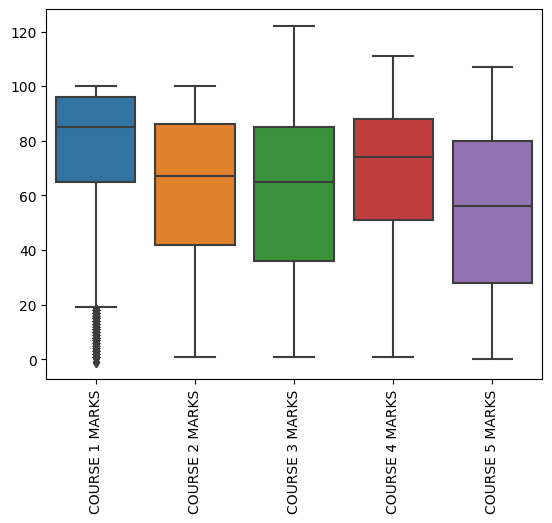

In [64]:
numeric_vars = ['COURSE 1 MARKS','COURSE 2 MARKS','COURSE 3 MARKS','COURSE 4 MARKS','COURSE 5 MARKS']
sns.boxplot(data=df3[numeric_vars])
plt.xticks(rotation=90)
plt.show()

In [79]:
# Detecting outliers with z score
outliers=[]
def detect_outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if(np.abs(z_score)>3):
            outliers.append(i)
    return outliers
marks_out=detect_outliers(df['COURSE 1 MARKS'])
count=len(marks_out)
print('total z score Outliers :' ,count)

total z score Outliers : 113


In [4]:
#  Outliers by IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
outliers = detect_outliers_iqr(df['COURSE 1 MARKS'])
print('Total iqr Outliers : ',outliers.sum())

Total iqr Outliers :  3213.0


In [81]:
len(df)

12411

In [5]:
# removing outliers using iqr
Q1=df['COURSE 1 MARKS'].quantile(0.25)
Q3=df['COURSE 1 MARKS'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df_no_outliers = df[(df['COURSE 1 MARKS'] >= Lower_Whisker) & (df['COURSE 1 MARKS'] <= Upper_Whisker)]

In [8]:
len(df_no_outliers)

12106

In [9]:
# One hot encoding
encoded_df=pd.get_dummies(df,columns=['GENDER'])
encoded_df.head(10)

,STUDENT_ID,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE,GENDER_F,GENDER_M
0,SB11201210000129,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS,1,0
1,SB11201210000137,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS,1,0
2,SB11201210005154,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION,0,1
3,SB11201210007504,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS,1,0
4,SB11201210007548,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS,0,1
5,SB11201210007568,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,86.0,15.0,32.0,97.0,36.0,63,FIRST CLASS,1,0
6,SB11201210007598,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,68.0,8.0,50.0,92.0,53.0,59,FIRST CLASS,0,1
7,SB11201210007615,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,86.0,94.0,97.0,98.0,99,THIRD CLASS,1,0
8,SB11201210010208,Yes,Yes,TECHNICAL,INDUSTRIAL ENGINEERING,51.0,57.0,43.0,3.0,19.0,28,FIRST CLASS,0,1
9,SB11201210013577,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,13.0,41.0,22.0,83.0,1.0,18,FIRST CLASS,0,1


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_df=df.copy()
le_df['le_placement']=le.fit_transform(df['PLACEMENT'])
le_df.head(10)

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE,le_placement
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS,1
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS,1
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION,0
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS,1
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS,1
5,SB11201210007568,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,86.0,15.0,32.0,97.0,36.0,63,FIRST CLASS,1
6,SB11201210007598,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,68.0,8.0,50.0,92.0,53.0,59,FIRST CLASS,1
7,SB11201210007615,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,86.0,94.0,97.0,98.0,99,THIRD CLASS,1
8,SB11201210010208,M,Yes,Yes,TECHNICAL,INDUSTRIAL ENGINEERING,51.0,57.0,43.0,3.0,19.0,28,FIRST CLASS,1
9,SB11201210013577,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,13.0,41.0,22.0,83.0,1.0,18,FIRST CLASS,1


In [11]:
le_df['le_sid']=le.fit_transform(df['STUDENT_ID'])
le_df.head(10)

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE,le_placement,le_sid
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS,1,0
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS,1,1
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION,0,2
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS,1,3
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS,1,4
5,SB11201210007568,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,86.0,15.0,32.0,97.0,36.0,63,FIRST CLASS,1,5
6,SB11201210007598,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,68.0,8.0,50.0,92.0,53.0,59,FIRST CLASS,1,6
7,SB11201210007615,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,86.0,94.0,97.0,98.0,99,THIRD CLASS,1,7
8,SB11201210010208,M,Yes,Yes,TECHNICAL,INDUSTRIAL ENGINEERING,51.0,57.0,43.0,3.0,19.0,28,FIRST CLASS,1,8
9,SB11201210013577,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,13.0,41.0,22.0,83.0,1.0,18,FIRST CLASS,1,9


In [13]:
categorical_cols=df.select_dtypes(exclude=np.number)
categorical_cols

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,FIRST CLASS


In [15]:
categories=categorical_cols.columns
categories

Index(['STUDENT_ID', 'GENDER', 'PLACEMENT', 'HONOR_OPTED_OR_NOT',
       'EDUCATION_TYPE', 'ACADEMIC_PROGRAM', 'OVEARLL_GRADE'],
      dtype='object')

In [16]:
for i in categories:
    categorical_cols[i]=le.fit_transform(categorical_cols[i])
categorical_cols.head(10)

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,0,0,1,1,0,13,1
1,1,0,1,1,0,13,3
2,2,1,0,1,0,10,0
3,3,0,1,1,0,13,1
4,4,1,1,1,0,13,1
5,5,0,1,1,0,13,1
6,6,1,1,1,0,13,1
7,7,0,1,1,0,13,3
8,8,1,1,1,2,13,1
9,9,1,1,1,0,13,1
